1. Plot of the liquid level.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Import, Display Demo image

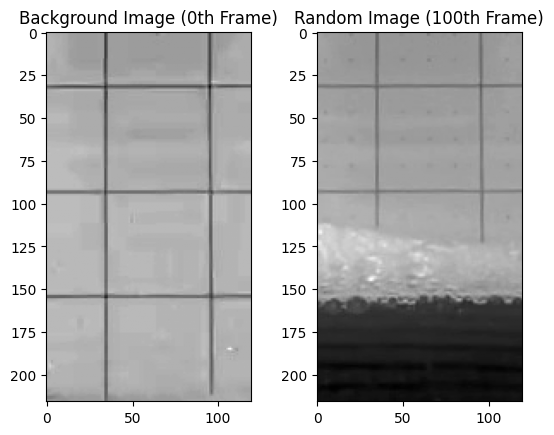

In [2]:
# Importing Demo Images
img_r = cv2.imread('liquid_frame100.jpg', 0)
img_b = cv2.imread('liquid_frame000.jpg', 0)

# Display the images
plt.subplot(122), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(121), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Apply Background substruction methode to randomly selected image

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Total Area: 25920
Percentage: 26.3 %


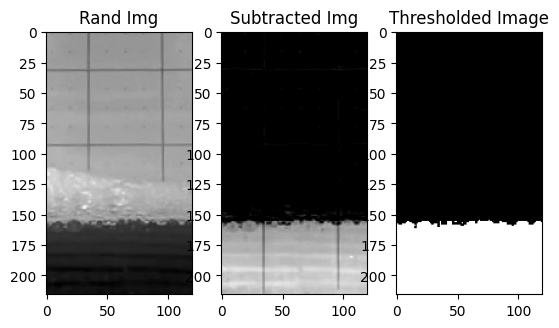

In [3]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

Import video and apply backgroung substruction to the randomly selected frame

In [4]:
# Reading frames from a video
cap = cv2.VideoCapture('liquidVideo.mp4')
ret, frame1 = cap.read()


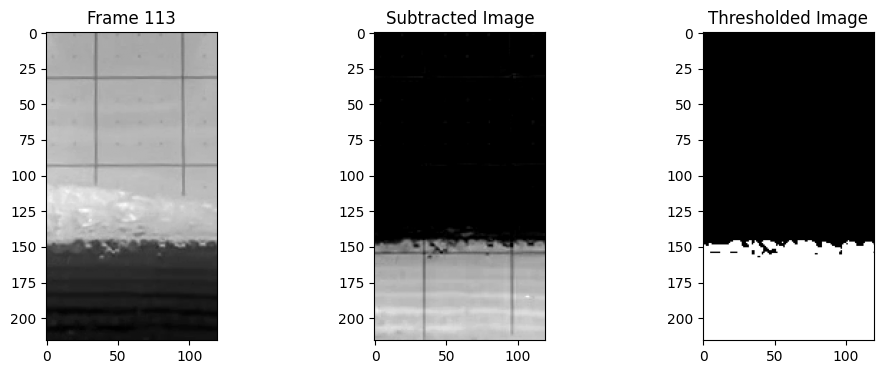

Frame 113 - Threshold: 50.0, Largest Contour Area: 7891.0, Percentage: 30.4%


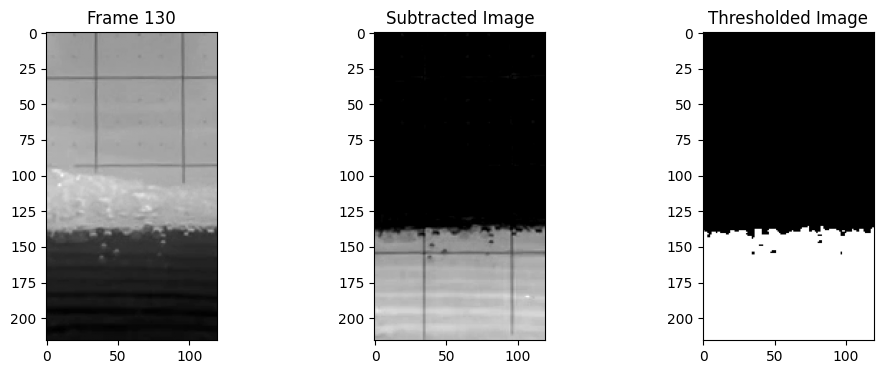

Frame 130 - Threshold: 51.0, Largest Contour Area: 8926.0, Percentage: 34.4%


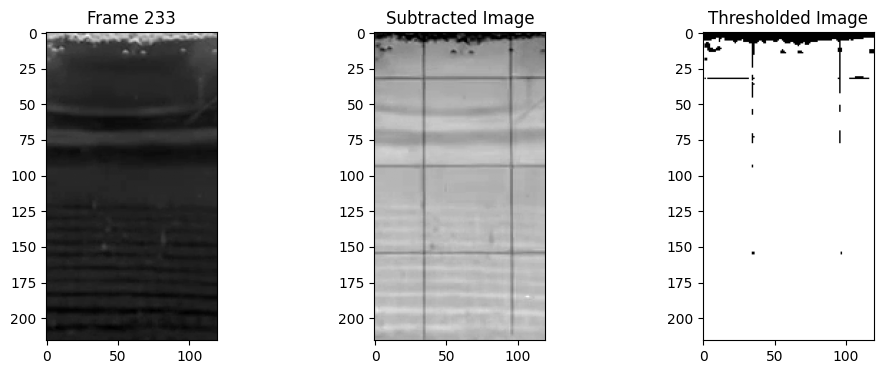

Frame 233 - Threshold: 65.0, Largest Contour Area: 24695.5, Percentage: 95.3%


In [5]:
import random

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Randomly select 3 frame indices
random_frames = random.sample(range(total_frames), 3)

for frame_idx in random_frames:
    # Set the video to the selected frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        continue

    # Convert the frame to grayscale and subtract the background image
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img_sub = cv2.subtract(img_b, gray_frame)

    # Threshold the subtracted image to obtain a binary image
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the original frame, subtracted image, and thresholded image side by side
    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(gray_frame, cmap='gray'), plt.title(f'Frame {frame_idx}')
    plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Image')
    plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
    plt.show()

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Calculate the percentage of the largest contour area
    if contours:
        percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
        print(f'Frame {frame_idx} - Threshold: {ret}, Largest Contour Area: {cv2.contourArea(contours[0])}, Percentage: {percentage}%')

cap.release()


Implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

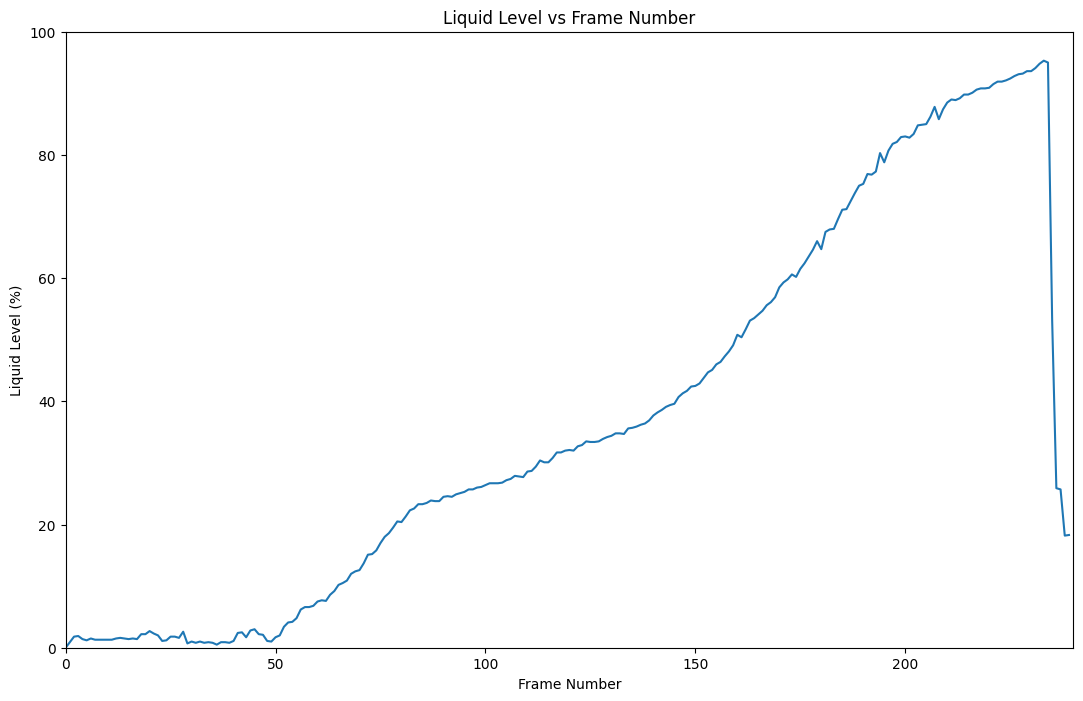

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the frames of video
capture = cv2.VideoCapture('liquidVideo.mp4')

# Check if the video capture object is opened successfully
if not capture.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the background image
img_b = cv2.imread('liquid_frame000.jpg', 0)

# total area of the image
total_area = img_b.shape[0] * img_b.shape[1]

# Initialize lists to store frame numbers and corresponding liquid levels
frame_numbers = []
liquid_levels = []

# Total number of frames in the video
total_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Loop through all frames in the video
for frame_num in range(total_frames):
    # Read the current frame
    ret, frame = capture.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Perform background subtraction
    img_sub = cv2.subtract(img_b, gray_frame)
    
    # Apply thresholding
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    
    # Percentage of the largest contour area
    if contours:
        percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
    else:
        percentage = 0
    
    # Add frame number and liquid level to the lists
    frame_numbers.append(frame_num)
    liquid_levels.append(percentage)

# Plot the liquid level vs frame number
plt.figure(figsize=(13, 8))
plt.xlim(0, total_frames)
plt.ylim(0, 100)
plt.plot(frame_numbers, liquid_levels)
plt.xlabel('Frame Number')
plt.ylabel('Liquid Level (%)')
plt.title('Liquid Level vs Frame Number')
plt.show()


2. 2. A brief note on what the student understood by reading the section on Otsu's threholding method.

What is Otsu's Thresholding?
Otsu's method is an automatic technique for determining the optimal threshold value to separate the foreground (important regions) from the background in an image. It is particularly effective when the image has two different regions, such as light and dark areas. The method evaluates all possible threshold values and selects the one that maximizes the difference between the two groups, ensuring clear separation.

How is it Used? 
In OpenCV, Otsu's method is applied using the `cv2.threshold` function with the `cv2.THRESH_OTSU` flag. To improve accuracy, the image can be preprocessed with a smoothing filter, such as Gaussian Blur, before applying the method. This approach is commonly used for tasks like document scanning or object segmentation in images.

3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

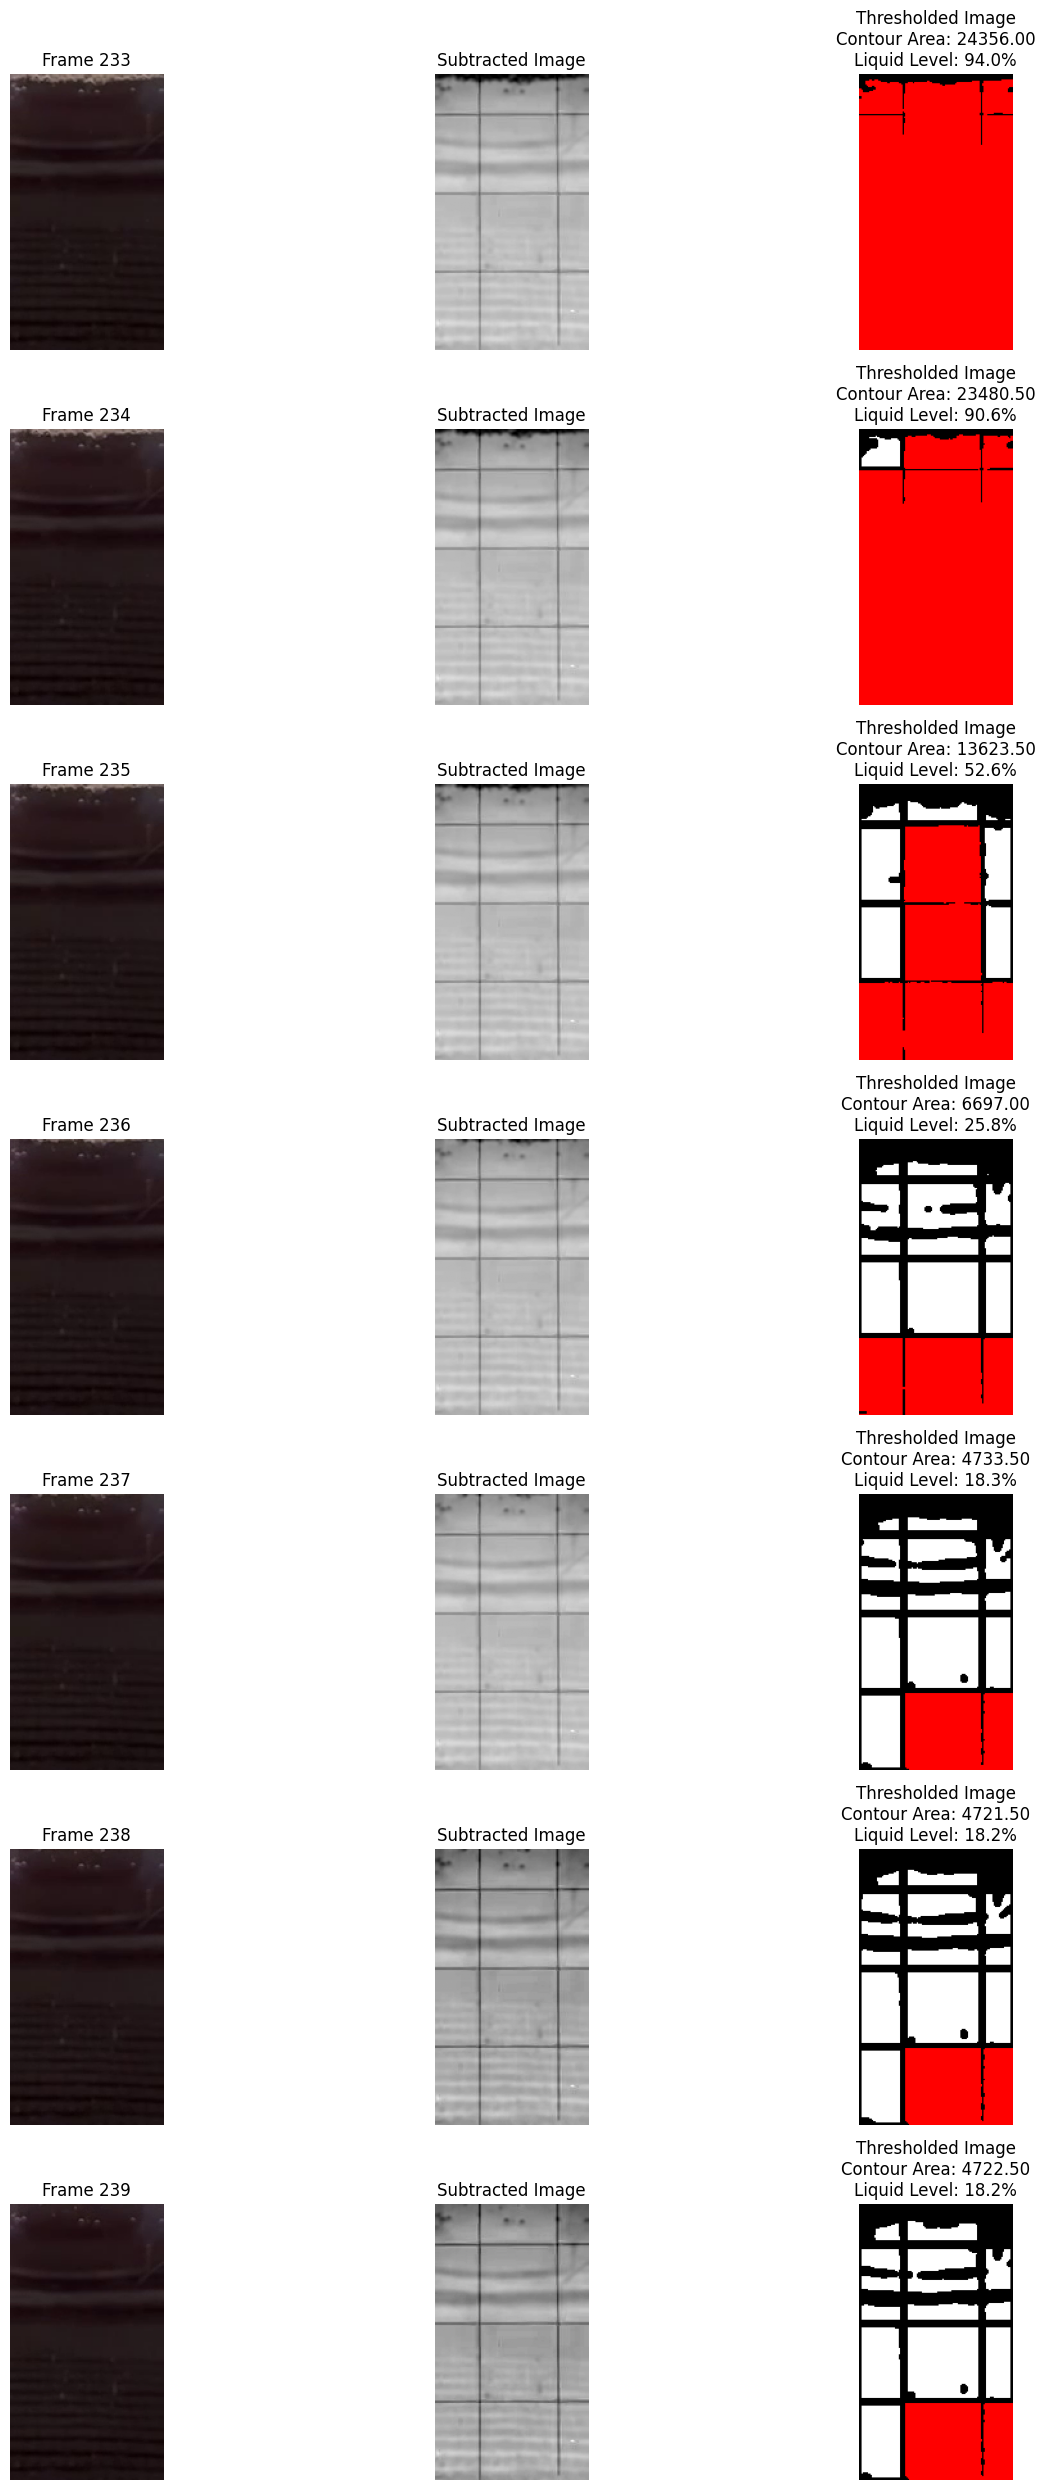

In [7]:
# Select the last 7 frames
last_frames = range(total_frames - 7, total_frames)

# Create a figure with subplots
fig, axes = plt.subplots(len(last_frames), 3, figsize=(15, 25))

for i, frame_idx in enumerate(last_frames):
    # Set the video to the specific frame
    capture.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    # Read the frame
    ret, frame = capture.read()
    if not ret:
        continue

    blur_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(blur_frame, cv2.COLOR_BGR2GRAY)
    
    # Subtract the background from the current frame
    img_sub = cv2.subtract(img_b, frame_gray)
    
    # Thresholding to get a binary image
    ret, img_th = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Area of the largest contour
    largest_contour_area = cv2.contourArea(contours[0]) if contours else 0
    liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1) if contours else 0

    # Draw the contour in the thresholded image
    img_th = cv2.cvtColor(img_th, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_th, contours, -1, (0, 0, 0), 2)

    # Shade the area of the largest contour in the thresholded image
    if contours:
        cv2.fillPoly(img_th, pts=[contours[0]], color=(255, 0, 0))
        
    # Display the current frame
    axes[i, 0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Frame {frame_idx}')
    axes[i, 0].axis('off')
    
    # Display the subtracted image
    axes[i, 1].imshow(img_sub, cmap='gray')
    axes[i, 1].set_title('Subtracted Image')
    axes[i, 1].axis('off')
    
    # Display the thresholded image with contour area and liquid percentage
    axes[i, 2].imshow(img_th, cmap='gray')
    axes[i, 2].set_title(f'Thresholded Image\nContour Area: {largest_contour_area:.2f}\nLiquid Level: {liquid_level_percentage:.1f}%')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

# Release the video capture object
capture.release()

The potential inaccuracies of this Otsu's technique can be highlighted based on the obtained results. The primary challenge with this technique arises when differenciating the liquid level from the background, particularly when the fluid reaches its maximum level.

Based on the results obtained, when the fluid level approaches its maximum, there is a clear distinction between the fluid level and the background, making it easier to define the contour area. However, at the maximum fluid level, the difference between the fluid and the background reference frame becomes negligible.Which means it is difficult to diferenciate the fuluid and background since whole frame could be same color. there is no dark, light difference As a result, applying the thresholding technique can lead to challenges in accurately differentiating the contours due to the background scale. 

As a result, instead of recognizing the liquid level as a single contour, it may be interpreted as multiple separate contours. Consequently, the largest contour area will appear smaller compared to the previous frame.As a result, when the algorithm processes the 234th frame, it indicates a decrease in the fluid level.


4. A brief description on the final algorithm developed by the student.

This algorithm I  developed to determine the liquid level throughout a video by processing each frame using background subtraction techniques such as background substraction, Otsu's thresholding, contour detection. the berief descrition about the algorithm given below:

1. Input initialization
    The video file is loaded using OpenCV, and a reference background image is read in grayscale.
    
        # Read the frames of video

        capture = cv2.VideoCapture('demo2_images/liquidVideo.mp4')

        # Check if the video capture object is opened successfully
    
        if not capture.isOpened():
        print("Error: Could not open video.")
        exit()

        # Read the background image (grayscale)

        img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

    loads the background image (in grayscale), which serves as a reference to detect the changes in subsequent frames



2. Calculate Total Area of the Image

    The total area of the background image is calculated to help later with percentage calculations of the liquid level.
   
        # Total area of the image
        total_area = img_b.shape[0] * img_b.shape[1]

    img_b.shape[0] and img_b.shape[1] give the height and width of the image, respectively. Multiplying these values gives the total pixel area of the background image.

    
    

3. Processing each frame

        # Initialize lists to store frame numbers and corresponding liquid levels
        frame_numbers = []
        liquid_levels = []

        # Loop through all frames in the video
        for frame_num in range(total_frames):

        # Read the current frame
        ret, frame = capture.read()
        if not ret:
        break
    
        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            

    capture.read() reads the current frame.
    cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) converts the frame to grayscale, simplifying the processing (as color is not needed for background subtraction).


4. Background Subtraction

    The difference between the background image and the current frame is calculated to highlight changes due to the liquid.

        # Perform background subtraction
        img_sub = cv2.subtract(img_b, gray_frame)


    cv2.subtract(img_b, gray_frame) performs a simple background subtraction. This helps in highlighting the regions where the liquid has moved or changed in the current frame.

5. Thresholding

    The difference image is thresholded to create a binary image, where the liquid areas become white (255), and the rest is black (0).

        # Apply thresholding
        ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    cv2.threshold() converts the subtraction result into a binary image. cv2.THRESH_OTSU automatically determines an optimal threshold value for binarization.

6. Contour Detection

    Contours are detected in the thresholded image to identify the boundaries of the liquid region.

        # Find contours
        contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Sort contours by area
        contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

        # Calculate the percentage of the largest contour area
         if contours:
            percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
         else:
            percentage = 0

    The area of the largest contour is calculated and expressed as a percentage of the total image area.

7. Result visualization

        # Add frame number and liquid level to the lists
        frame_numbers.append(frame_num)
        liquid_levels.append(percentage)

    The frame number and corresponding liquid level are stored in the respective lists.The frame_num and percentage (liquid level) are added to frame_numbers and liquid_levels, respectively, for later plotting.

        # Plot the liquid level vs frame number
        plt.figure(figsize=(13, 8))
        plt.xlim(0, total_frames)
        plt.ylim(0, 100)
        plt.plot(frame_numbers, liquid_levels)
        plt.xlabel('Frame Number')
        plt.ylabel('Liquid Level (%)')
        plt.title('Liquid Level vs Frame Number')
        plt.show()

    Finally, the liquid level data is plotted against the frame number
